<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/Time_Series_Analysis_of_AR%2CMA%2CARMA_%2CARIMA%2CSARIMA(ASS_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**kunal routray**

Import required libraries

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.simplefilter('ignore')


Load and preprocess data

In [10]:
#Load dataset
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                     header=0, index_col=0)
series.index = pd.to_datetime(series.index)
series.columns = ['Passengers']
data = series

#Check for missing values
print(data.isnull().sum())


Passengers    0
dtype: int64


EDA - Plot time series

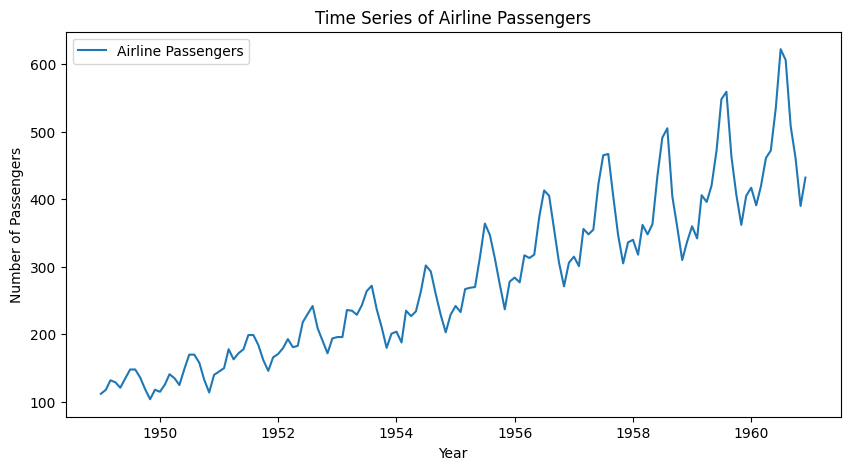

In [11]:
# EDA - Plot time series
plt.figure(figsize=(10, 5))
plt.plot(data, label="Airline Passengers")
plt.title("Time Series of Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()



ADF Test for Stationarity

In [12]:
#check for stationary
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

adf_test(data['Passengers'])


ADF Statistic: 0.8153688792060528
p-value: 0.9918802434376411
The series is not stationary.


In [13]:
#Seasonal differencing (for D)
data_diff = data['Passengers'].diff(periods=12).dropna()
adf_seasonal = adfuller(data_diff) # Assuming adf_seasonal is defined somewhere
print(f"ADF p-value after seasonal differencing:{adf_seasonal[1]}")

if adf_seasonal[1] < 0.05:
    print("The series is stationary after seasonal differencing.")
else:
    print("The series is not stationary after seasonal differencing.")


ADF p-value after seasonal differencing:0.011551493085514952
The series is stationary after seasonal differencing.


Model Implementation

A)AR MODEL

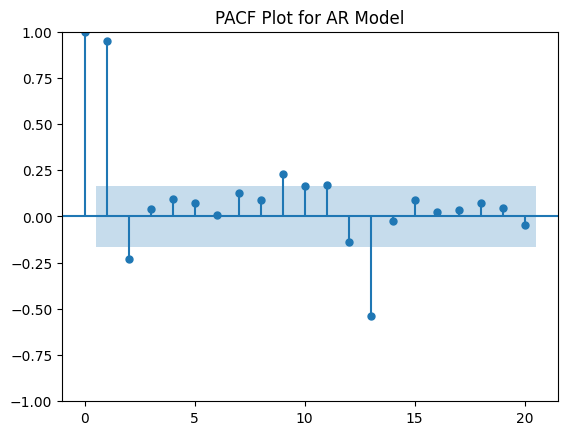

AR Model Summary:
                             AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     AutoReg(2)   Log Likelihood                -691.539
Method:               Conditional MLE   S.D. of innovations             31.534
Date:                Tue, 08 Jul 2025   AIC                           1391.079
Time:                        14:17:44   BIC                           1402.902
Sample:                    03-01-1949   HQIC                          1395.883
                         - 12-01-1960                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.4821      6.811      2.420      0.016       3.134      29.831
Passengers.L1     1.2766      0.080     16.009      0.000       1.120       1.433
Passengers.L2    -0.3

In [14]:
# PACF plot to choose p
plot_pacf(data['Passengers'], lags=20)
plt.title("PACF Plot for AR Model")
plt.show()

# Fit AR model with p = 2
model_ar = AutoReg(data['Passengers'], lags=2).fit()
print("AR Model Summary:\n", model_ar.summary())


B)MA MODEL

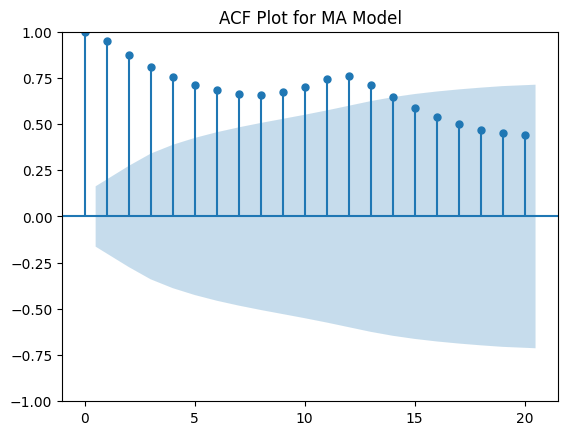


MA Model Summary:
                                SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -757.063
Date:                Tue, 08 Jul 2025   AIC                           1522.126
Time:                        14:17:44   BIC                           1534.005
Sample:                    01-01-1949   HQIC                          1526.953
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.4095     14.386     19.491      0.000     252.213     308.606
ma.L1          1.3825     23.075      0.060      0.952     -43.844      46.609
ma.L2          1.0000     33.380

In [15]:
# ACF plot to choose q
plot_acf(data['Passengers'], lags=20)
plt.title("ACF Plot for MA Model")
plt.show()

# Fit MA model with q = 2
model_ma = ARIMA(data['Passengers'], order=(0, 0, 2)).fit()
print("\nMA Model Summary:\n", model_ma.summary())



C)ARMA MODEL

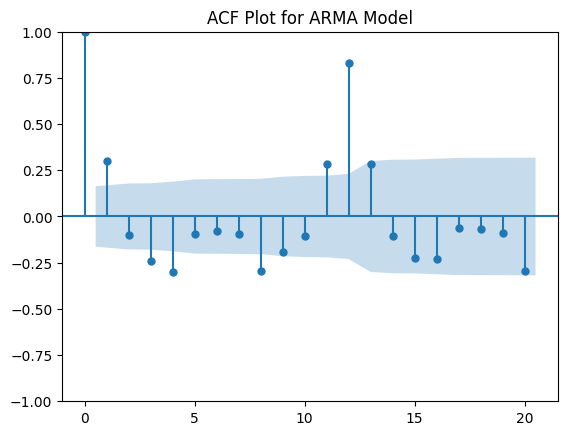

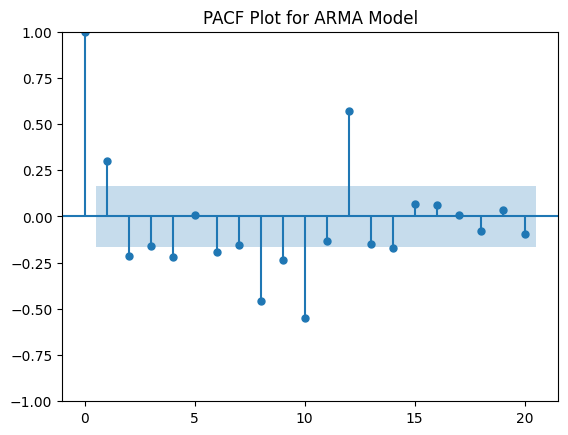


ARMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -698.172
Date:                Tue, 08 Jul 2025   AIC                           1408.344
Time:                        14:17:44   BIC                           1426.162
Sample:                    01-01-1949   HQIC                          1415.584
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3016     60.094      4.664      0.000     162.519     398.084
ar.L1          0.2540      0.223      1.137      0.256      -0.184       0.692
ar.L2          0.6510      0.1

In [16]:
# First differencing to get stationary series
data_diff = data['Passengers'].diff().dropna()

# ACF and PACF on differenced data
plot_acf(data_diff, lags=20)
plt.title("ACF Plot for ARMA Model")
plt.show()

plot_pacf(data_diff, lags=20)
plt.title("PACF Plot for ARMA Model")
plt.show()

# Fit ARMA model with p=2, q=2 (based on plots)
model_arma = ARIMA(data['Passengers'], order=(2, 0, 2)).fit()
print("\nARMA Model Summary:\n", model_arma.summary())


D)ARIMA MODEL


ADF Test p-value (original): 0.9918802434376411

ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 08 Jul 2025   AIC                           1353.347
Time:                        14:17:45   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000     

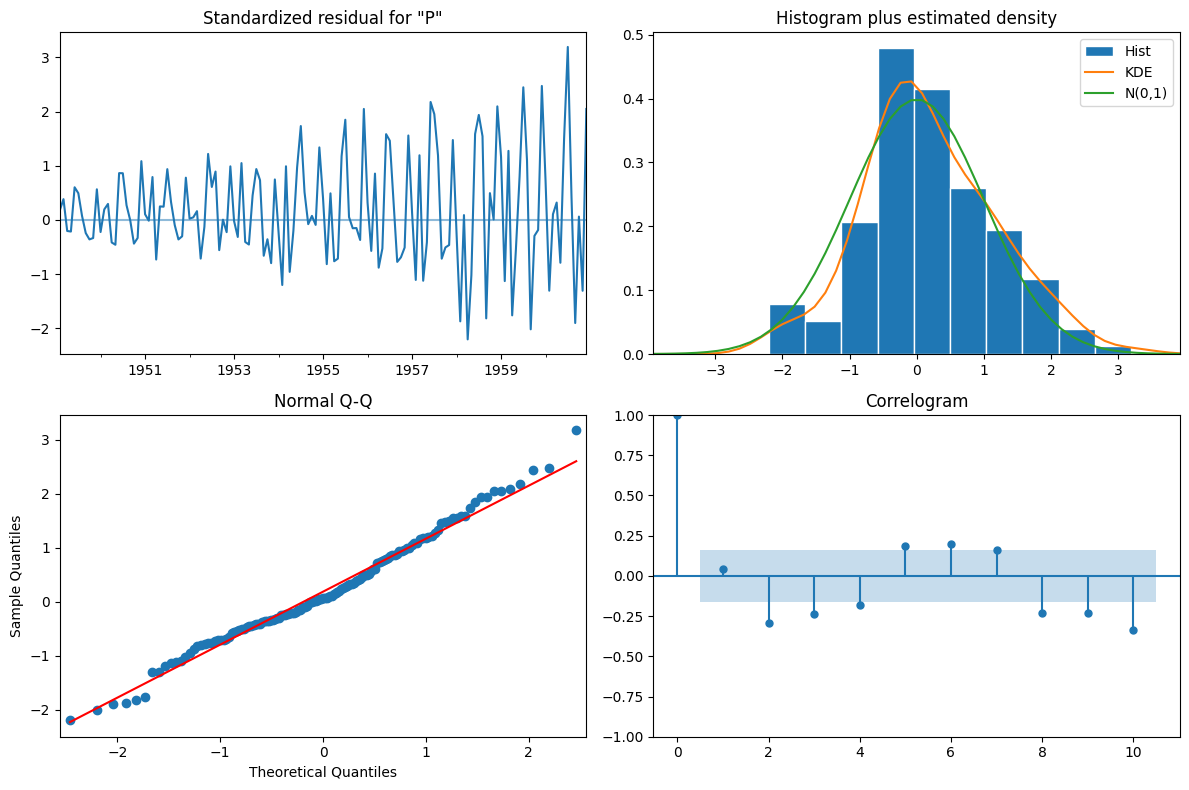

In [17]:
# ADF test on original data
result = adfuller(data['Passengers'])
print("\nADF Test p-value (original):", result[1])

# d = 1 (since p > 0.05, series is non-stationary)

# Fit ARIMA model with (p=2, d=1, q=2)
model_arima = ARIMA(data['Passengers'], order=(2, 1, 2)).fit()
print("\nARIMA Model Summary:\n", model_arima.summary())

# Diagnostics
model_arima.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()



E)SARIMA MODEL

In [18]:
# Fit SARIMA: (2,1,2)x(1,1,1,12)
model_sarima = SARIMAX(data['Passengers'],
                       order=(2, 1, 2),
                       seasonal_order=(1, 1, 1, 12)).fit()
print("\nSARIMA Model Summary:\n", model_sarima.summary())





SARIMA Model Summary:
                                       SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -503.024
Date:                              Tue, 08 Jul 2025   AIC                           1020.048
Time:                                      14:17:46   BIC                           1040.174
Sample:                                  01-01-1949   HQIC                          1028.226
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4441      0.388      1.145      0.252      -0.316       1

Forecasting

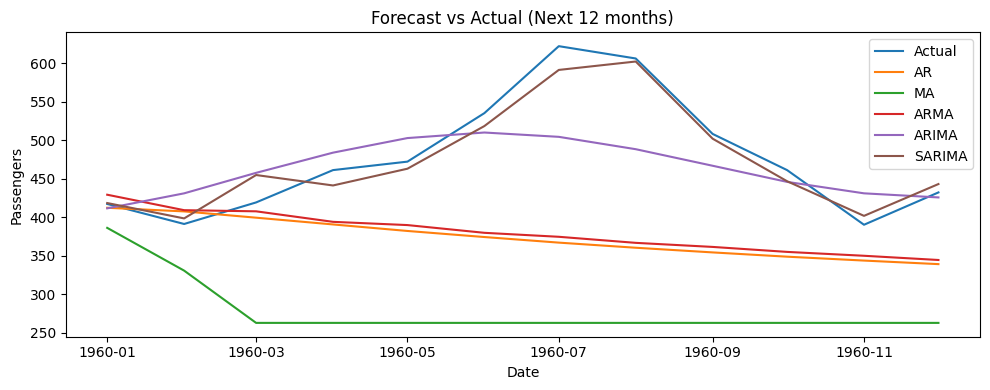

In [19]:
# Define forecast horizon
forecast_steps = 12
train = data['Passengers'][:-forecast_steps]
test = data['Passengers'][-forecast_steps:]

# AR Forecast
model_ar_forecast = AutoReg(train, lags=2).fit()
pred_ar = model_ar_forecast.predict(start=len(train), end=len(train)+forecast_steps-1)

# MA Forecast
model_ma_forecast = ARIMA(train, order=(0,0,2)).fit()
pred_ma = model_ma_forecast.forecast(steps=forecast_steps)

# ARMA Forecast
model_arma_forecast = ARIMA(train, order=(2,0,2)).fit()
pred_arma = model_arma_forecast.forecast(steps=forecast_steps)

# ARIMA Forecast
model_arima_forecast = ARIMA(train, order=(2,1,2)).fit()
pred_arima = model_arima_forecast.forecast(steps=forecast_steps)

# SARIMA Forecast
model_sarima_forecast = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12)).fit()
pred_sarima = model_sarima_forecast.forecast(steps=forecast_steps)

# Plot forecasts
plt.figure(figsize=(10, 4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred_ar, label='AR')
plt.plot(test.index, pred_ma, label='MA')
plt.plot(test.index, pred_arma, label='ARMA')
plt.plot(test.index, pred_arima, label='ARIMA')
plt.plot(test.index, pred_sarima, label='SARIMA')
plt.title("Forecast vs Actual (Next 12 months)")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.tight_layout()
plt.show()







Evaluation

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def evaluate_model(true, pred):
    rmse = np.sqrt(mean_squared_error(true, pred))
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred) * 100
    return rmse, mae, mape

# Evaluate all models
results = []
results.append(['AR', *evaluate_model(test, pred_ar)])
results.append(['MA', *evaluate_model(test, pred_ma)])
results.append(['ARMA', *evaluate_model(test, pred_arma)])
results.append(['ARIMA', *evaluate_model(test, pred_arima)])
results.append(['SARIMA', *evaluate_model(test, pred_sarima)])

# Show evaluation table
eval_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'MAPE'])
print("\nModel Evaluation Summary:")
print(eval_df)



Model Evaluation Summary:
    Model        RMSE         MAE       MAPE
0      AR  133.059161  105.823837  20.364283
1      MA  219.565058  197.709002  39.703238
2    ARMA  128.108174  101.240582  19.438494
3   ARIMA   55.222839   41.834798   8.220491
4  SARIMA   17.206172   13.987851   2.958075
